# Geometry Blend on the plane

In [1]:
# Appending parent path to load gblend
import sys
sys.path.append("..")

# Import blending libraries
from gblend.logic import parse_logic
from gblend.geometry2d import *
from gblend.variables import x,y,k
import gblend.logic as lg

# Importing mathematical libraries
import numpy as np
from sympy import init_printing, lambdify, pi
# Importing graphics libraries and utilities
from plotly.offline import init_notebook_mode
import d2 as r2d
import d3 as r3d
init_notebook_mode(connected=True)
init_printing()

## We now compute functions that represent the union, intersection and difference of two disks

In [ ]:
fs = dict()

# Create disk
disk =disk_2d()
disk = translate_2d(disk,-3/4,0)

# Create ellipse
ellipse = disk_2d()
ellipse = scale_2d(ellipse,.5,.8)
ellipse = translate_2d(ellipse,2/4,0)

fs = {'d':disk,'e':ellipse}

f = parse_logic('d | e',fs)    # Union
g = parse_logic('d & e',fs)    # Intersection
h = parse_logic('d &(~e)',fs)  # Difference

kval = 1/8
lf = lambdify((x,y), f.subs({k:kval}), 'numpy')
lg = lambdify((x,y), g.subs({k:kval}), 'numpy')
lh = lambdify((x,y), h.subs({k:kval}), 'numpy')
l = 2.5
domain = [-l,l,-l,l]

r2d.plot_data([r2d.function_contour(lf,domain=domain,level=.5)])

In [ ]:
r3d.plot_data([r3d.function_graph(lf,domain=domain)])
r3d.plot_data([r3d.function_graph(lg,domain=domain)])
r3d.plot_data([r3d.function_graph(lh,domain=domain)])

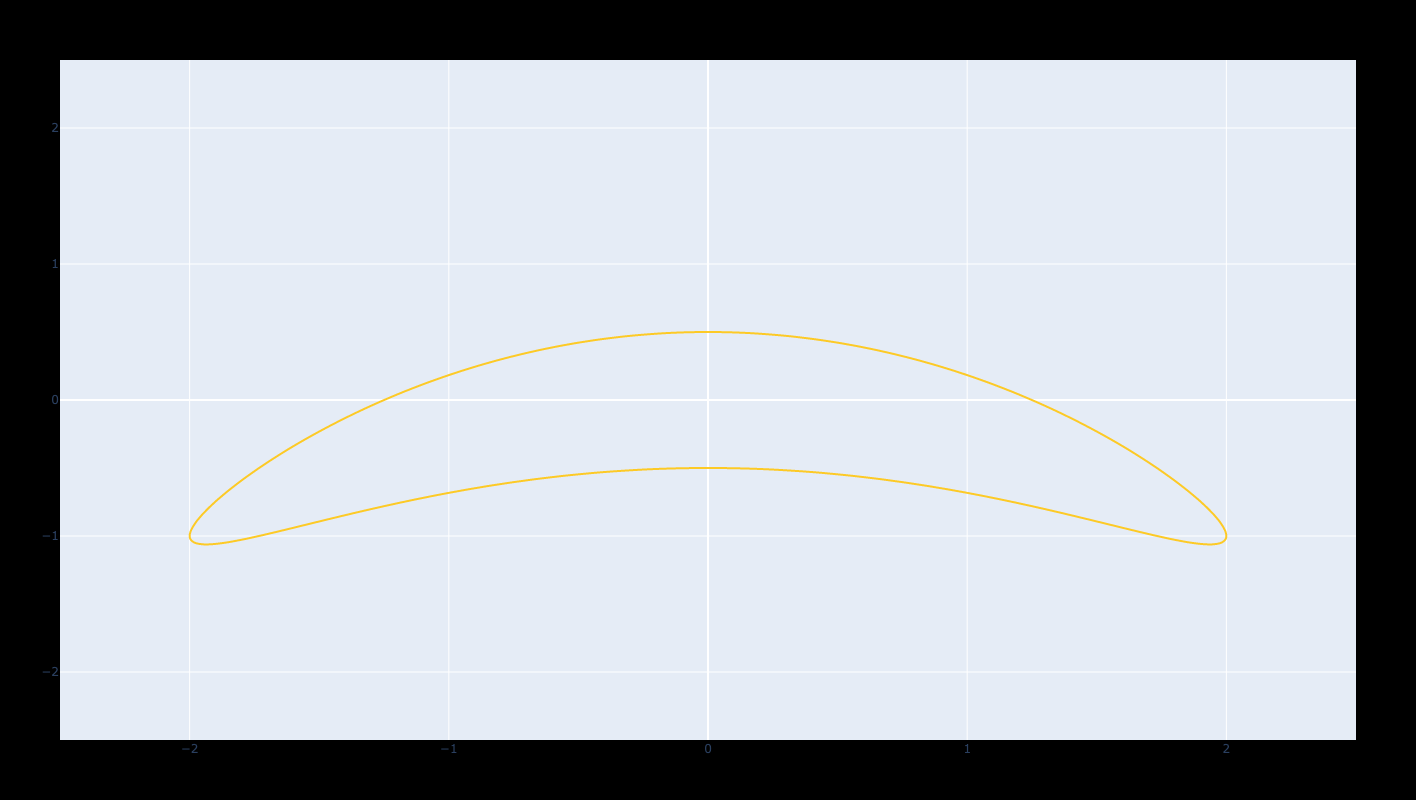

In [24]:
l = 2.5
domain = [-l,l,-l,l]
qd = quadratic_d2(scale_2d(disk_2d(),2.0,.5),a=-1/4)
lf = lambdify((x,y), qd.subs({k:1}), 'numpy')
r2d.plot_data([r2d.function_contour(lf,domain=domain,level=.5)])